In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [45]:
img = cv2.imread('images/pizza.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

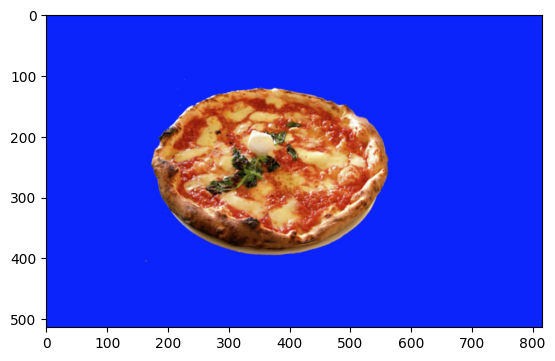

In [46]:
plt.imshow(img)
plt.show()

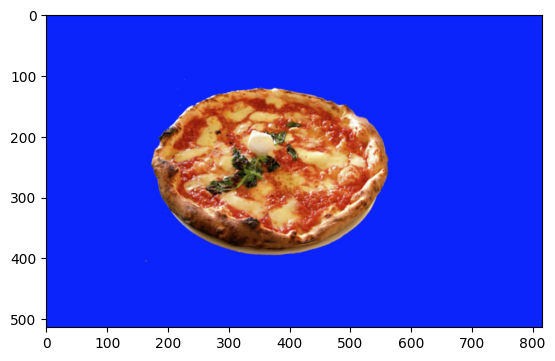

In [47]:
img_copy = np.copy(img)

plt.imshow(img_copy)
plt.show()

In [48]:
img.ndim

3

In [49]:
img.size

1258272

In [50]:
img.shape

(514, 816, 3)

In [52]:
% matplotlib qt

plt.imshow(img_copy)
plt.show()

In [53]:
% matplotlib inline

In [54]:
range_1 = np.array([0, 0, 230])
range_2 = np.array([50, 100, 255])

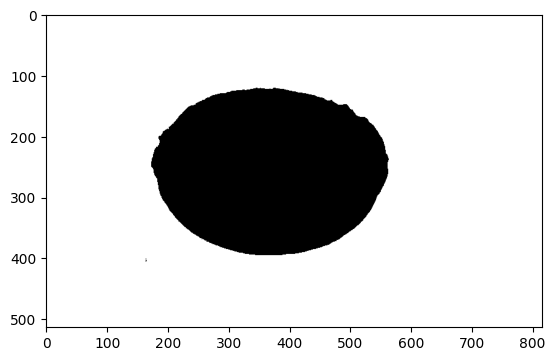

In [55]:
mask = cv2.inRange(img_copy, range_1, range_2)

plt.imshow(mask, cmap='gray')
plt.show()

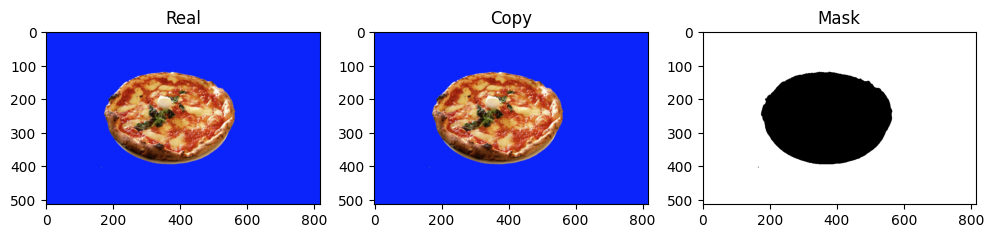

In [13]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.title("Real")
plt.imshow(img)

plt.subplot(132)
plt.title("Copy")
plt.imshow(img_copy)

plt.subplot(133)
plt.title("Mask")
plt.imshow(mask, cmap='gray')

plt.show()

In [14]:
print(mask)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [15]:
mask.shape

(514, 816)

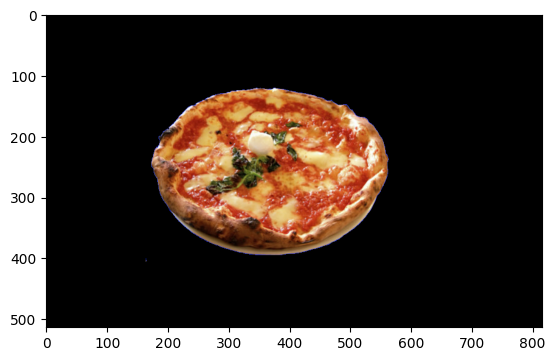

In [16]:
img_copy[mask != 0] = 0

plt.imshow(img_copy)
plt.show()

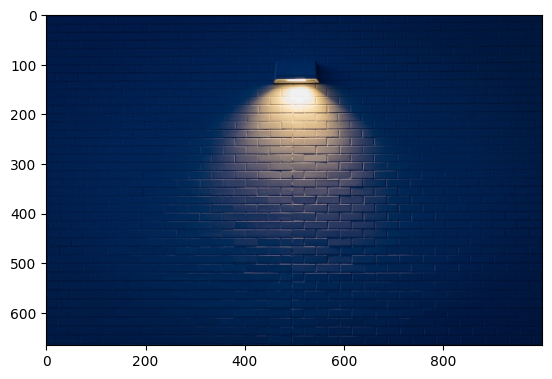

In [17]:
back_img = cv2.imread('images/background.jpg')
back_img = cv2.cvtColor(back_img, cv2.COLOR_BGR2RGB)

plt.imshow(back_img)
plt.show()

In [18]:
back_img.shape

(666, 1000, 3)

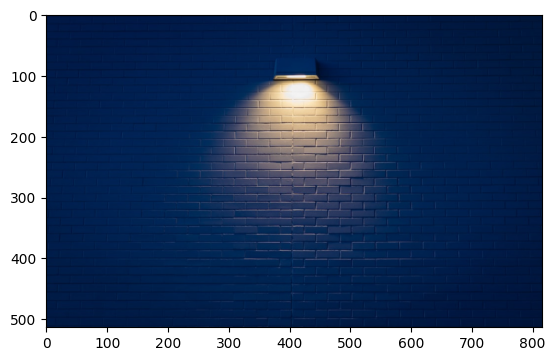

In [19]:
back_img = cv2.resize(back_img, dsize=(816, 514))

plt.imshow(back_img)
plt.show()

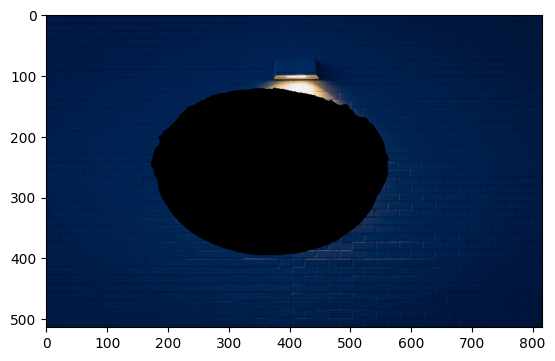

In [20]:
back_img_copy = np.copy(back_img)
back_img_copy[mask == 0] = 0

plt.imshow(back_img_copy)
plt.show()

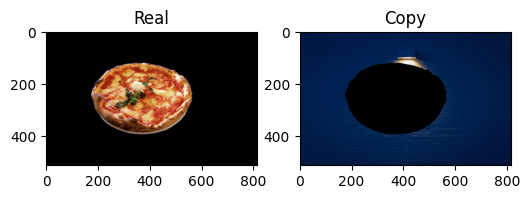

In [21]:
plt.figure(figsize=(6, 3))

plt.subplot(121)
plt.title("Real")
plt.imshow(img_copy)

plt.subplot(122)
plt.title("Copy")
plt.imshow(back_img_copy)

plt.show()

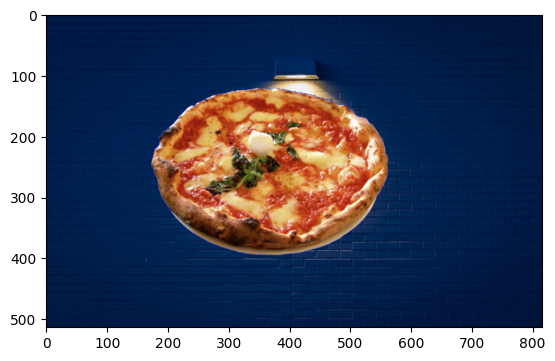

In [22]:
res_img = back_img_copy + img_copy

plt.imshow(res_img)
plt.show()

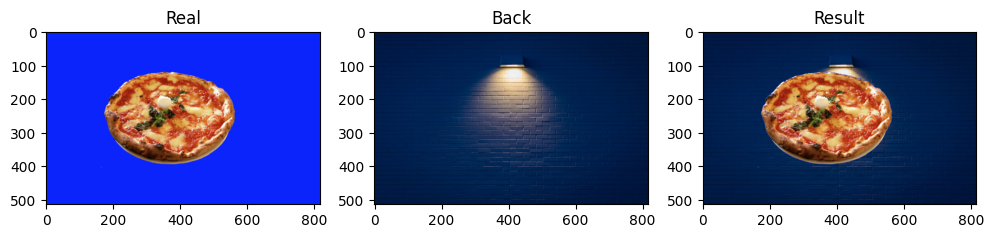

In [23]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.title("Real")
plt.imshow(img)

plt.subplot(132)
plt.title("Back")
plt.imshow(back_img)

plt.subplot(133)
plt.title("Result")
plt.imshow(res_img, cmap='gray')

plt.show()

In [9]:
video = cv2.VideoCapture("videos/video.mp4")

while video.isOpened():

    _, frame = video.read()
    frame = cv2.resize(frame, (640, 480))

    cv2.imshow('frame', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

# add an unfamiliar image to the video

In [70]:
video = cv2.VideoCapture("videos/video.mp4")
img = cv2.imread('images/pizza.jpg')
img = cv2.resize(img, (640, 480))

i = 0
while video.isOpened():

    _, frame = video.read()
    frame = cv2.resize(frame, (640, 480))

    if i % 24 == 0:
        cv2.imshow('frame', img)
        cv2.waitKey(10)

    cv2.imshow('frame', frame)

    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
    i += 1

video.release()
cv2.destroyAllWindows()

In [64]:
video = cv2.VideoCapture("videos/video.mp4")
img = cv2.imread('images/pizza.jpg')
img = cv2.resize(img, (640, 480))
mask = cv2.inRange(img, range_1[::-1], range_2[::-1])
img[mask != 0] = 0

while video.isOpened():

    _, frame = video.read()
    frame = cv2.resize(frame, (640, 480))
    frame[mask != 255] = 0
    frame = frame + img

    cv2.imshow('frame', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

# Homework

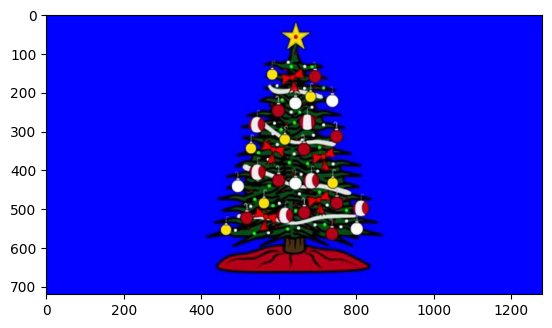

In [89]:
%matplotlib inline
fir = cv2.imread('images/fir.jpeg')
fir = cv2.cvtColor(fir, cv2.COLOR_BGR2RGB)

plt.imshow(fir)
plt.show()

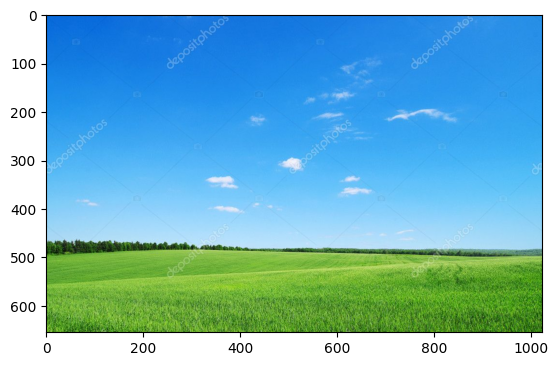

In [98]:
%matplotlib inline
field = cv2.imread('images/field.jpg')
field = cv2.cvtColor(field, cv2.COLOR_BGR2RGB)

plt.imshow(field)
plt.show()

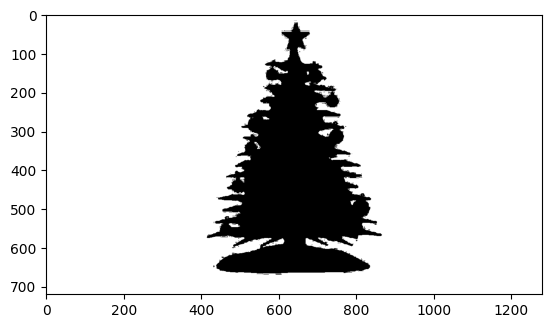

In [91]:
range_1 = np.array([0, 0, 100])
range_2 = np.array([10, 10, 255])

mask = cv2.inRange(fir, range_1, range_2)

plt.imshow(mask, cmap='gray')
plt.show()

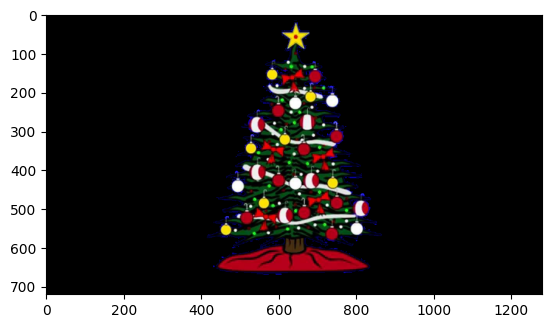

In [92]:
fir[mask==255] = 0
plt.imshow(fir)
plt.show()

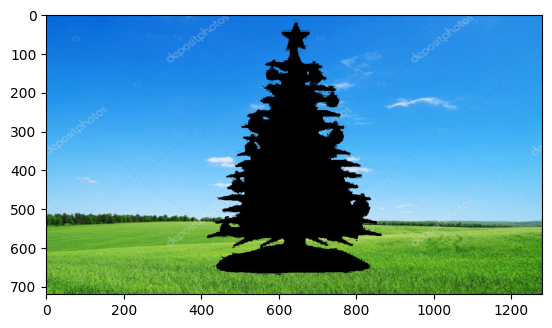

In [104]:
field = cv2.resize(field, (1280, 720))
field[mask==0] = 0
plt.imshow(field)
plt.show()

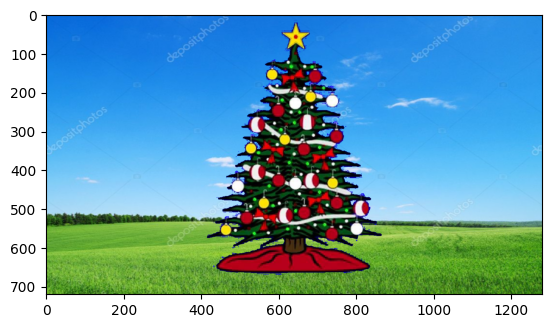

In [105]:
field_plus_fir = field + fir

plt.imshow(field_plus_fir)
plt.show()

# ________________________________________________________________________

In [119]:
video = cv2.VideoCapture('videos/uTorrent.mp4')
video2 = cv2.VideoCapture("videos/imaginefor1minute.mp4")

range_1 = np.array([200, 0, 0])
range_2 = np.array([[255, 60, 50]])

while video.isOpened() and video2.isOpened():

    _, frame = video.read()
    _, frame2 = video2.read()

    frame2 = cv2.resize(frame2, (1920, 1080))

    mask = cv2.inRange(frame, range_1, range_2)
    frame[mask!=0] = 0
    frame2[mask==0] = 0

    frame = frame + frame2

    cv2.imshow('frame', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

video.release()
video2.release()
cv2.destroyAllWindows()